## Resources

## Import and Initializations

In [1]:
# data processing library
import pandas as pd

# plot library
import plotly.express as px

## Functions

In [2]:
# get user growth based on data frame
def get_user_growth(df, label):
    total_user_2011 = df[df['yr'] == '2011'][label].sum()
    total_user_2012 = df[df['yr'] == '2012'][label].sum()

    return ((total_user_2012 - total_user_2011) / total_user_2011)

In [3]:
# Scale plot for better view
def scale_plot(fig, x_max, y_max):
    fig.update_layout(autosize = False, width = x_max, height = y_max)

## Data Preparation

In [4]:
df_bike_hour = pd.DataFrame(pd.read_csv('dataset/bike_sharing_hour_transformed.csv'))

## Plot Preparation

In [29]:
# Labellings for easy plot reading
years = ['2011', '2012']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday']
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# Situation related category
weathersits = ['Light', 'Medium', 'Heavy', 'Very Heavy']                       
holidays = ['No', 'Yes']
working_days = ['No', 'Yes']

# Labelling for plots
plot_labels = {'yr': 'Year', 'mnth' : 'Month', 'hr' : "Hour", 'weekday' : 'Weekday', 
               'season' : 'Seasons', 'weathesit' : 'Weather Situation', 'cnt' : 'Total Rentals', 'casual' : 'Total Casual Rentals', 'registered' : 'Total Registered Rentals'}

# Set Year to String for better plot axis
df_bike_hour['yr'] = df_bike_hour['yr'].astype('str')

# Plot x and y size
x_length = 900
y_length = 900

## Business Insight and Findings

### User Base Growth
As show by 'Total Rental Growth' graph bellow, user base has grown by 64.48% in the one year period with casual user growth on 50.76% and registered user by 68.37%

In [6]:
# Group by Months and Hours for Sum of Casual, Registered and Total Rental
df_hour_year_total = df_bike_hour.groupby(['yr', 'hr'])['cnt'].sum().reset_index()
df_hour_year_casual = df_bike_hour.groupby(['yr', 'hr'])['casual'].sum().reset_index()
df_hour_year_registered = df_bike_hour.groupby(['yr', 'hr'])['registered'].sum().reset_index()

# User growth from 2011 to 2012
total_user_growth = get_user_growth(df_hour_year_total, 'cnt')
casual_user_growth = get_user_growth(df_hour_year_casual, 'casual')
registered_user_growth = get_user_growth(df_hour_year_registered, 'registered')
#print(total_user_growth, ' | ', casual_user_growth, ' | ', registered_user_growth)

#### Total User in 2011 Compared to 2012 [64.48% increase]

In [30]:
fig = px.line_3d(df_hour_year_total, x = 'hr', y = 'yr', z = 'cnt', color = 'yr', category_orders = {'yr': years}, labels = plot_labels, 
                 title = 'Total User Hourly Activity by Year')
scale_plot(fig, x_length, y_length)
fig.show()

#### Total Casual User in 2011 Compared to 2012 [50.76% increase]

In [31]:
fig = px.line_3d(df_hour_year_casual, x = 'hr', y = 'yr', z = 'casual', color = 'yr', category_orders = {'yr': years}, labels = plot_labels,
                                 title = 'Total Casual User Hourly Activity by Year')
scale_plot(fig, x_length, y_length)
fig.show()

#### Total Registered User in 2011 Compared to 2012 [68.37% increase]

In [32]:
fig = px.line_3d(df_hour_year_registered, x = 'hr', y = 'yr', z = 'registered', color = 'yr', category_orders = {'yr': years}, labels = plot_labels,
                 title = 'Total Registered User Hourly Activity by Year')

scale_plot(fig, x_length, y_length)
fig.show()

### User Acitivity during Weekdays

In [10]:
# Group by Months and Hours for Sum of Casual, Registered and Total Rental
df_hour_weekday_total = df_bike_hour.groupby(['weekday', 'hr'])['cnt'].sum().reset_index()
df_hour_weekday_casual = df_bike_hour.groupby(['weekday', 'hr'])['casual'].sum().reset_index()
df_hour_weekday_registered = df_bike_hour.groupby(['weekday', 'hr'])['registered'].sum().reset_index()

df_hour_weekday_year_total = df_bike_hour.groupby(['yr', 'weekday', 'hr'])['cnt'].sum().reset_index()

#### Total Rentals on Hour vs Weekday from 2011 to 2012
* As indicated by 'Total Rentals on Hour vs Weekday' graph bellow, majority of rentals happen before and after working hours with peak at 5 pm. 
* This data can be used for inventory management for the rentals making sure that all the request are being fulfilled. 

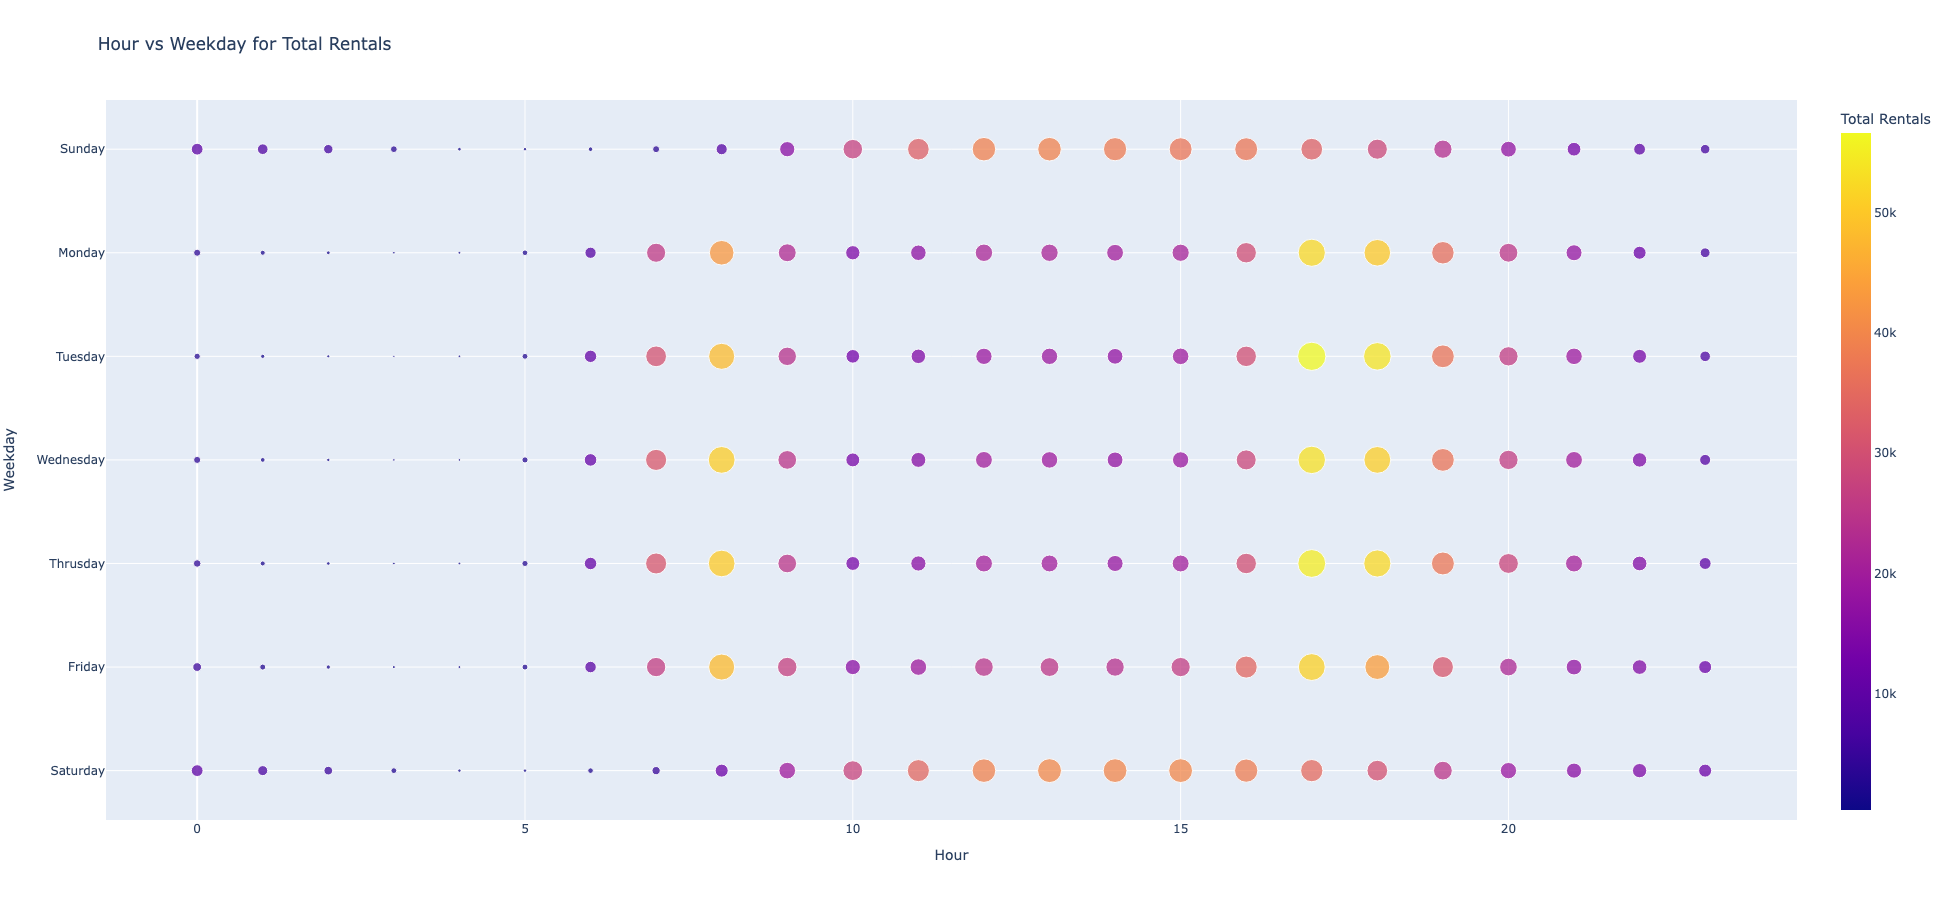

In [34]:
fig = px.scatter(df_hour_weekday_total, x = 'hr', y = 'weekday', color = 'cnt', size = 'cnt', opacity = 0.75, category_orders = {'weekday': weekdays}, labels = plot_labels, 
                 title = 'Hour vs Weekday for Total Rentals')
scale_plot(fig, 1200, y_length)
fig.show()

In [35]:
# 3d Representation of Total Rentals on Hour vs Weekday from 2011 to 2012
fig = px.line_3d(df_hour_weekday_total, x = 'hr', y = 'weekday',  z = 'cnt', color = 'weekday', category_orders = {'weekday': weekdays}, labels = plot_labels, 
                 title = '3D Representation on Hour vs Weekday for Total Rentals')
scale_plot(fig, x_length, y_length)
fig.show()

#### Total Rentals on Hour vs Weekday on 2011 Compared to 2012
* As shows by 2 graphs bellow, consistent behavior throughout the year for all user. 
* Baseline projection for total user in 2013 can also be drawn from this data.

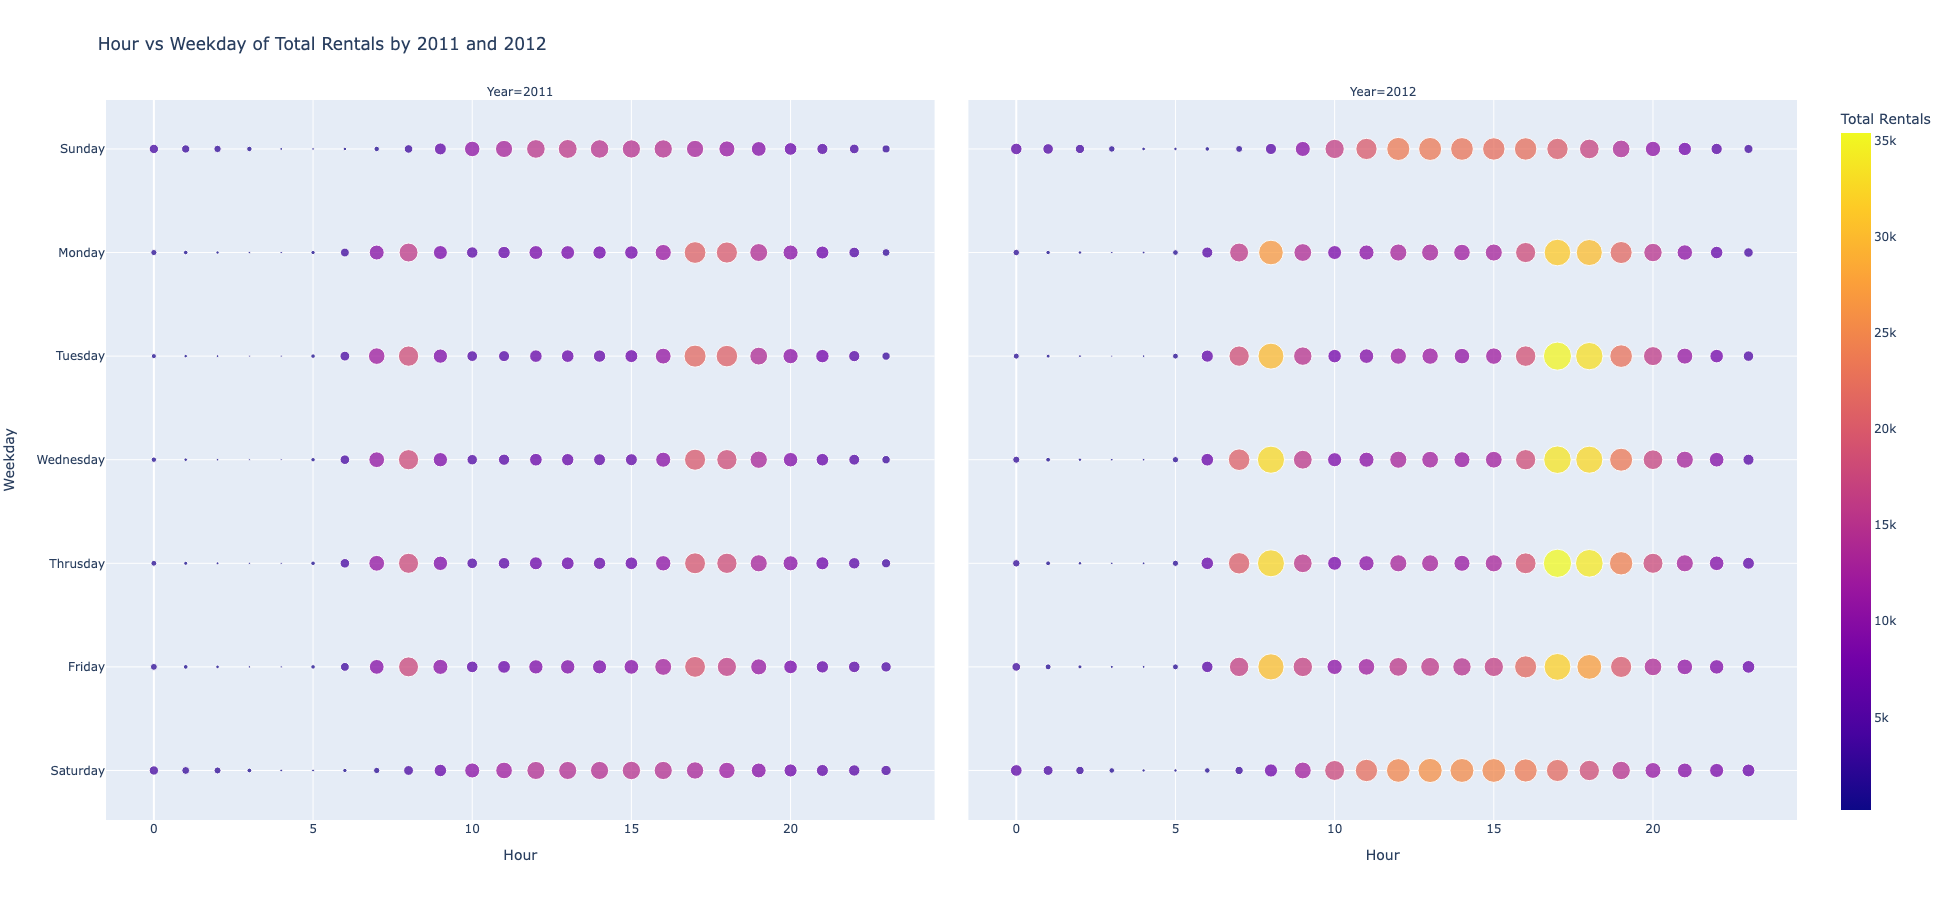

In [37]:
fig = px.scatter(df_hour_weekday_year_total, x = 'hr', y = 'weekday', facet_col = 'yr', color = 'cnt', size = 'cnt', opacity = 0.75, 
                 category_orders = {'yr' : years, 'weekday': weekdays}, labels = plot_labels, title = 'Hour vs Weekday of Total Rentals by 2011 and 2012')
scale_plot(fig, 1750, y_length)
fig.show()

#### Total Casual Rentals on Hour vs Weekday from 2011 to 2012
Breaking down user based shows that most casual user are active during the weekend (ie. Sunday and Saturday). 
Business strategies can be generate based on this behavior, for example:
* Running a survey during about why they are not registered during this time periods
* Provide deals or promotion to covert these user and monitor the conversion rate for business growth.

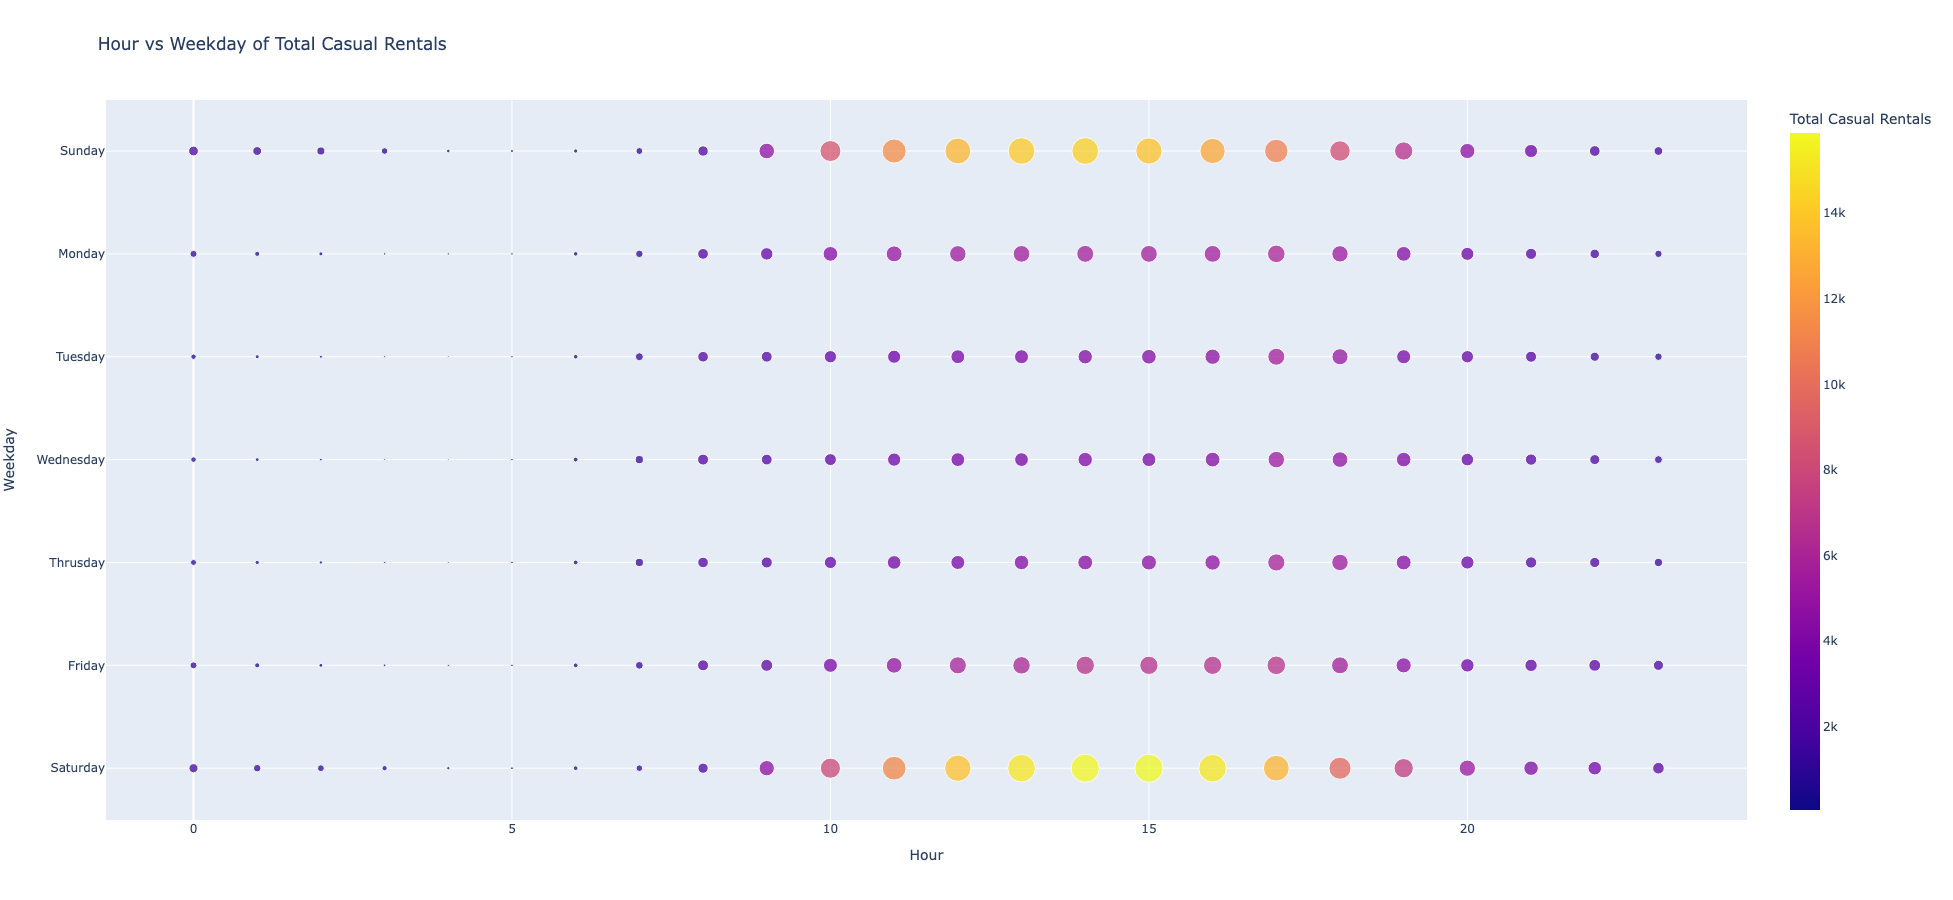

In [38]:
fig = px.scatter(df_hour_weekday_casual, x = 'hr', y = 'weekday', color = 'casual', size = 'casual', opacity = 0.75, 
                 category_orders = {'weekday': weekdays}, labels = plot_labels, title = 'Hour vs Weekday of Total Casual Rentals')
scale_plot(fig, 1200, y_length)
fig.show()

In [40]:
# 3D Representation of Total Casual Rentals on Hour vs Weekday from 2011 to 2012
fig = px.line_3d(df_hour_weekday_casual, x = 'hr', y = 'weekday', z = 'casual', color = 'weekday', 
                 category_orders = {'weekday': weekdays}, labels = plot_labels, title = '3D Representation for Hour vs Weekday of Total Casual Rentals')
scale_plot(fig, x_length, y_length)
fig.show()

#### Total Registered Rentals on Hour vs Weekday from 2011 to 2012
* As indicated by graph bellow, registered user are more active during weekday before and after working hours between 7 - 8 AM and 5 - 7 PM.
* Inventory management can be planned out during this time period to makes sure there are enough bikes for the users.
* Business process can also be improve to streamline the rental process making sure the user has the best user experience with the service

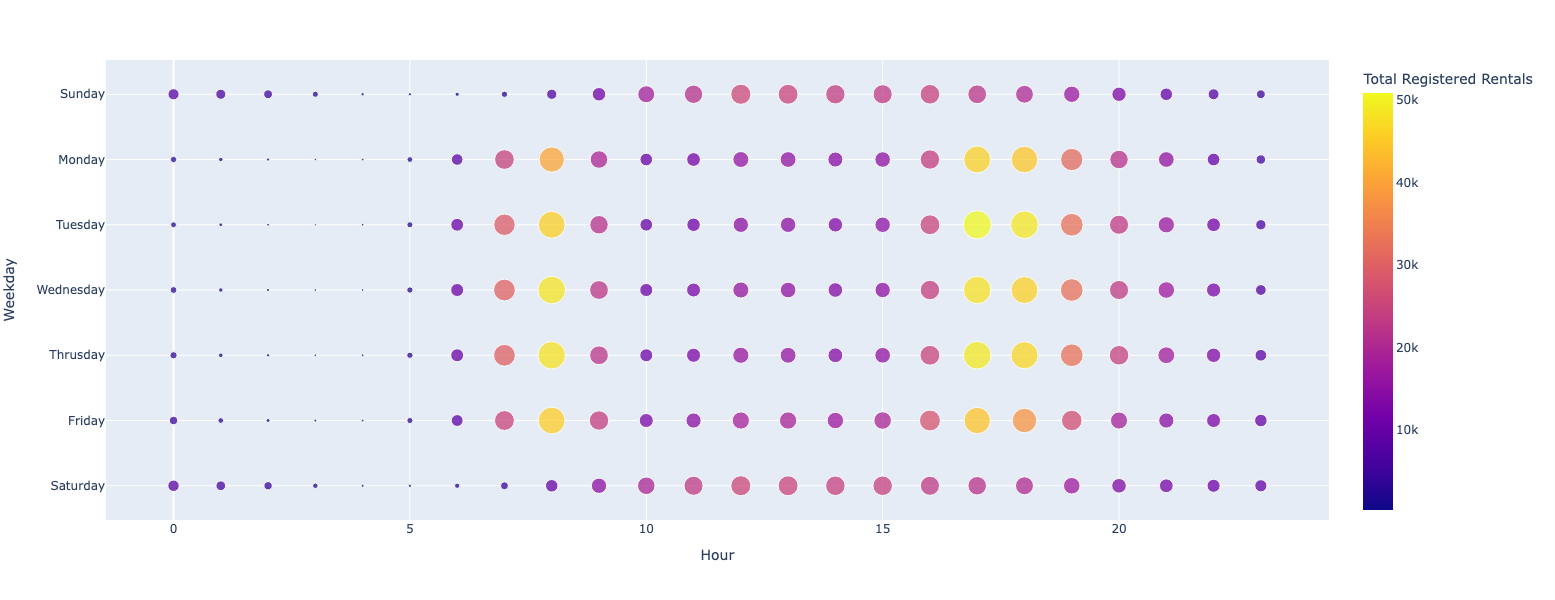

In [16]:
fig = px.scatter(df_hour_weekday_registered, x = 'hr', y = 'weekday', color = 'registered', size = 'registered', opacity = 0.75, 
                 category_orders = {'weekday': weekdays}, labels = plot_labels, title = 'Hour vs Weekday of Total Registered Rentals')
scale_plot(fig, 1200, y_length)
fig.show()

In [41]:
# 3D Representation of Total Registered Rentals on Hour vs Weekday
fig = px.line_3d(df_hour_weekday_registered, x = 'hr', y = 'weekday', z = 'registered', color = 'weekday', 
                 category_orders = {'weekday': weekdays}, labels = plot_labels, title = '3D Reprensetaion for Hour vs Weekday of Total Registered Rentals')
scale_plot(fig, x_length, y_length)
fig.show()

### User Activity by Hour vs Month from 2011 to 2012

In [18]:
# Group by Months and Hours for Sum of Casual, Registered and Total Rental
df_hour_month_total = df_bike_hour.groupby(['mnth', 'hr'])['cnt'].sum().reset_index()
df_hour_month_casual = df_bike_hour.groupby(['mnth', 'hr'])['casual'].sum().reset_index()
df_hour_month_registered = df_bike_hour.groupby(['mnth', 'hr'])['registered'].sum().reset_index()

#### Total Rentals on Hour vs Month from 2011 to 2012
* During Spring and Summer user overall user activity picks up

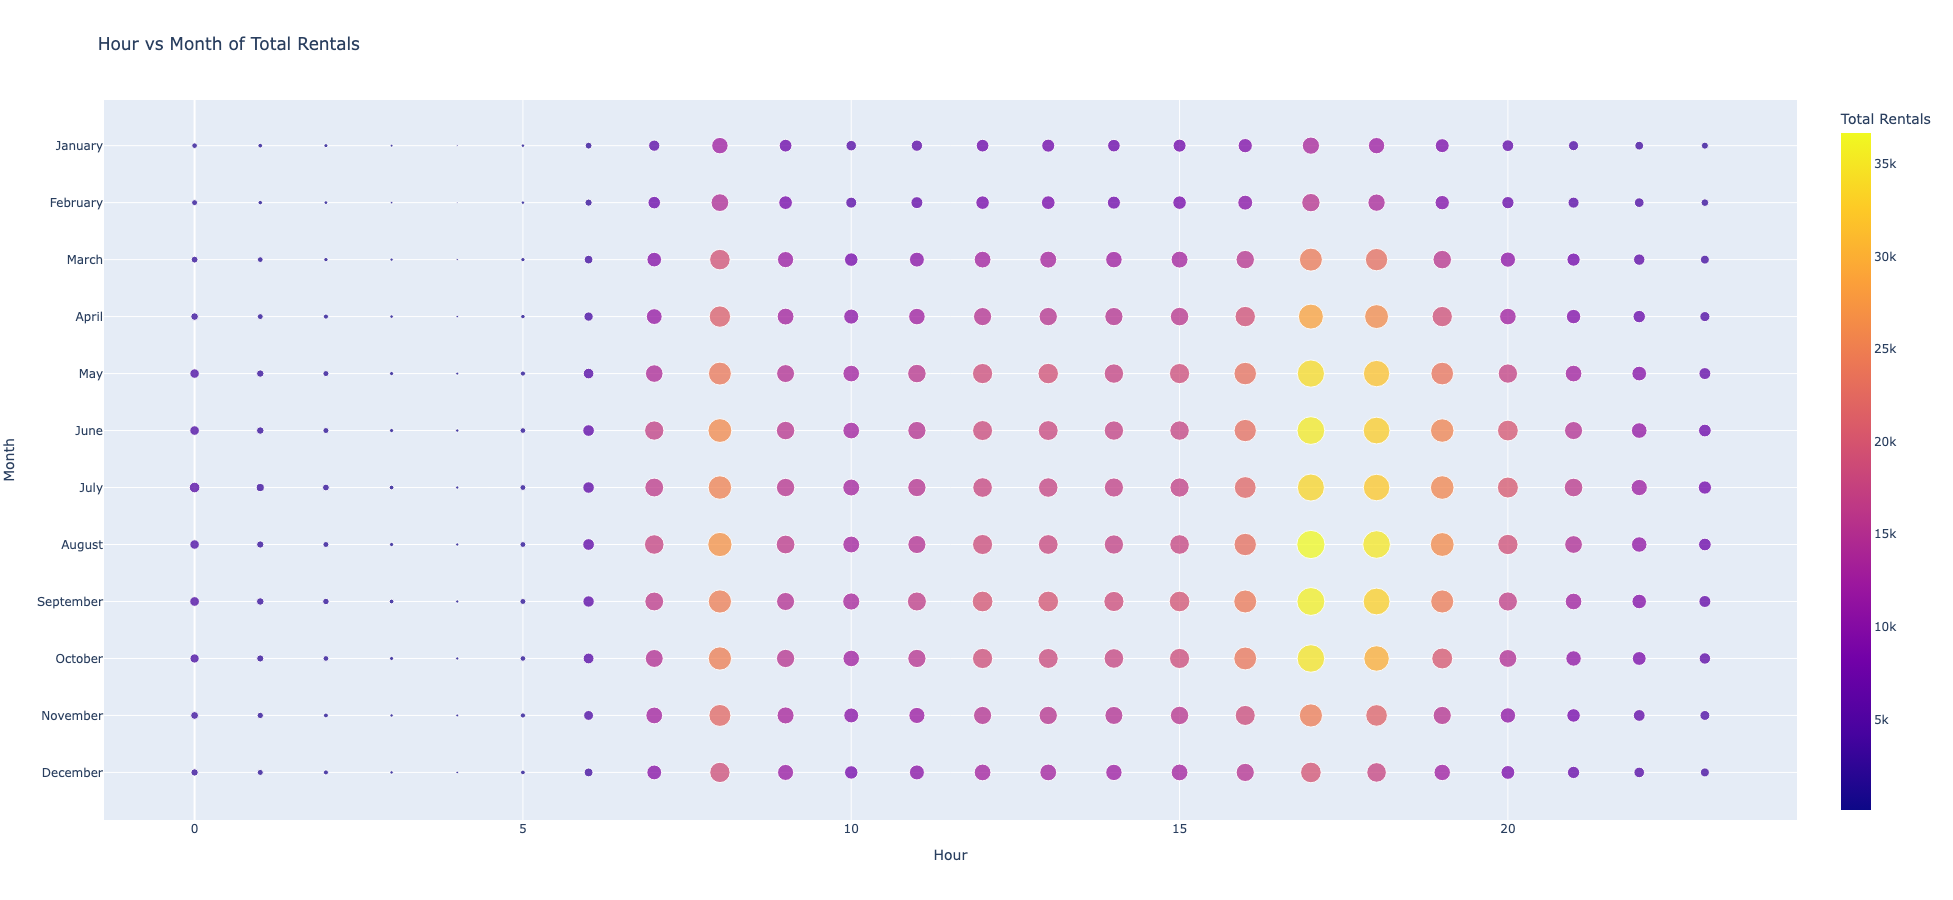

In [42]:
fig = px.scatter(df_hour_month_total, x = 'hr', y = 'mnth', color = 'cnt', size = 'cnt', opacity = 0.75, 
                 category_orders = {'mnth': months}, labels = plot_labels, title = 'Hour vs Month of Total Rentals')
scale_plot(fig, 1200, y_length)
fig.show()

In [43]:
# 3D Representation of Total Rentals on Hour vs Month from 2011 to 2012
fig = px.line_3d(df_hour_month_total, x = 'hr', y = 'mnth', z = 'cnt', color = 'mnth', 
                 category_orders = {'mnth': months}, labels = plot_labels, title = '3D Representation for Hour vs Month of Total Rentals')
scale_plot(fig, x_length, y_length)
fig.show()

#### Total Casual Rentals on Hour vs Month from 2011 to 2012
* Indicates similar conclusion as overall user

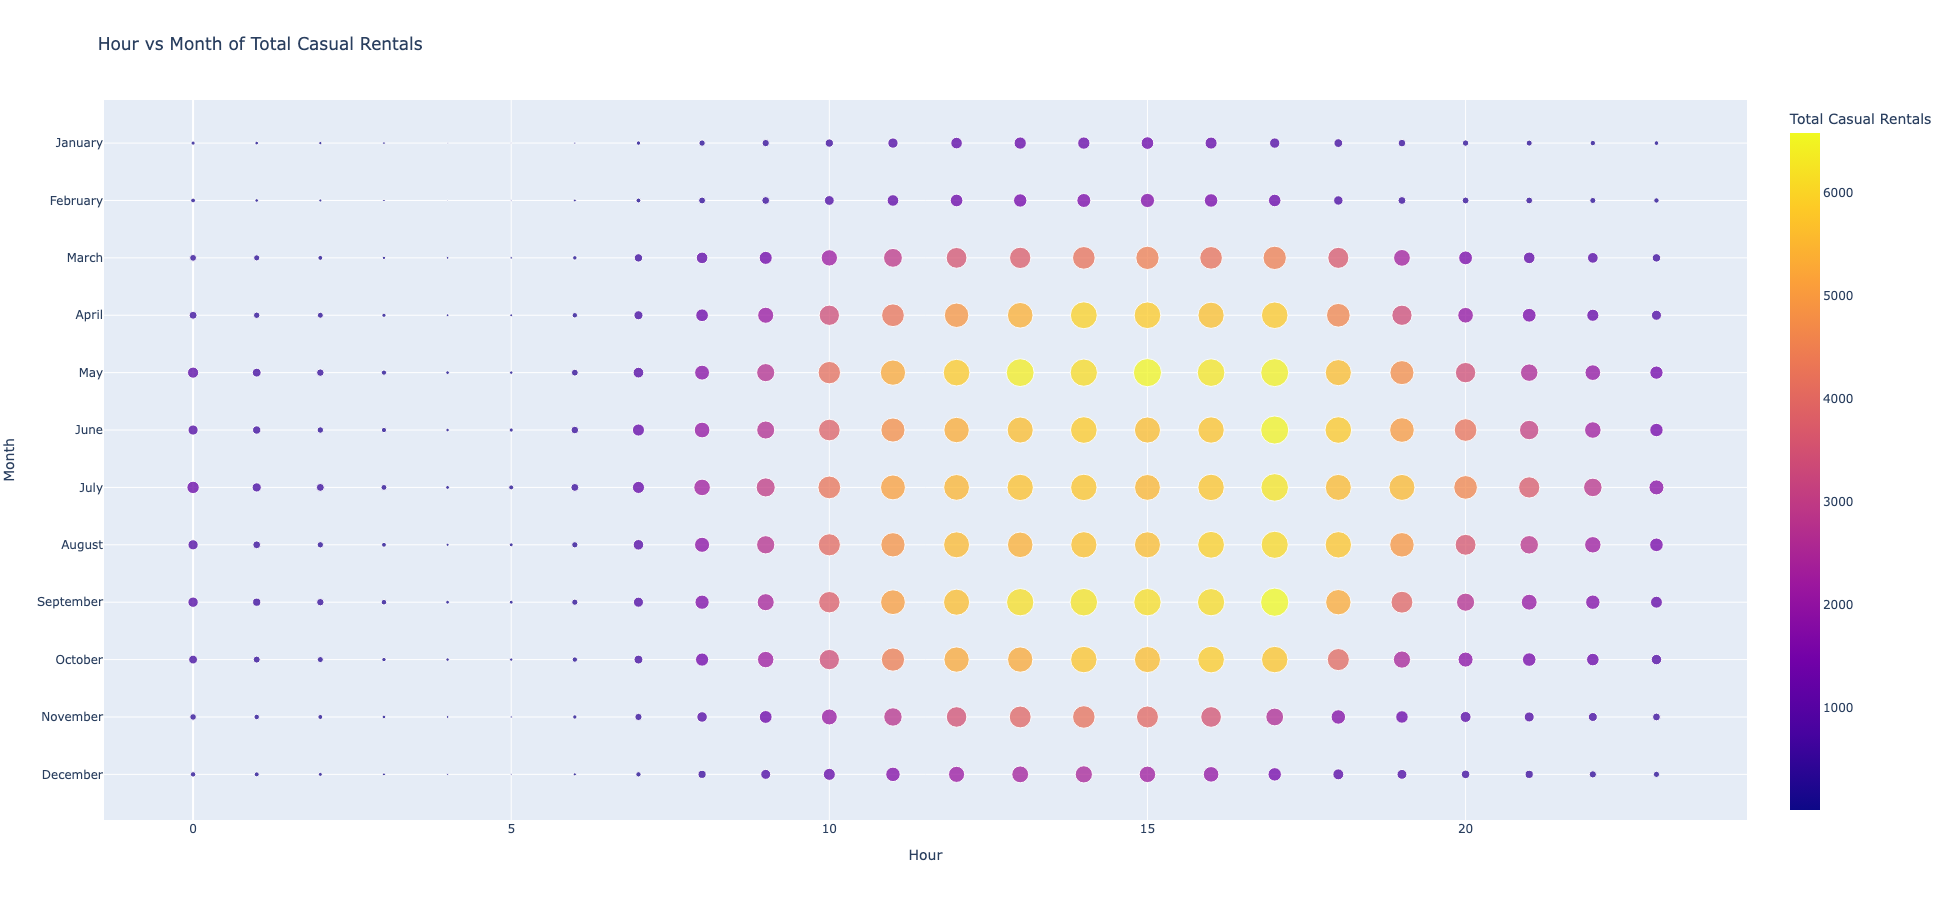

In [44]:
fig = px.scatter(df_hour_month_casual, x = 'hr', y = 'mnth', color = 'casual', size = 'casual', opacity = 0.75, 
                 category_orders = {'mnth': months}, labels = plot_labels, title = 'Hour vs Month of Total Casual Rentals')
scale_plot(fig, 1200, y_length)
fig.show()

In [45]:
# 3D Represenation of Total Casual Rentals on Hour vs Month from 2011 to 2012
fig = px.line_3d(df_hour_month_casual, x = 'hr', y = 'mnth', z = 'casual', color = 'mnth', category_orders = {'mnth': months}, 
                 title = '3D Representation for Hour vs Month of Total Casual Rentals', labels = plot_labels)
scale_plot(fig, x_length, y_length)
fig.show()

#### Total Registered Rentals on Hour vs Month from 2011 to 2012
* Indicates similar conclusion as overall user

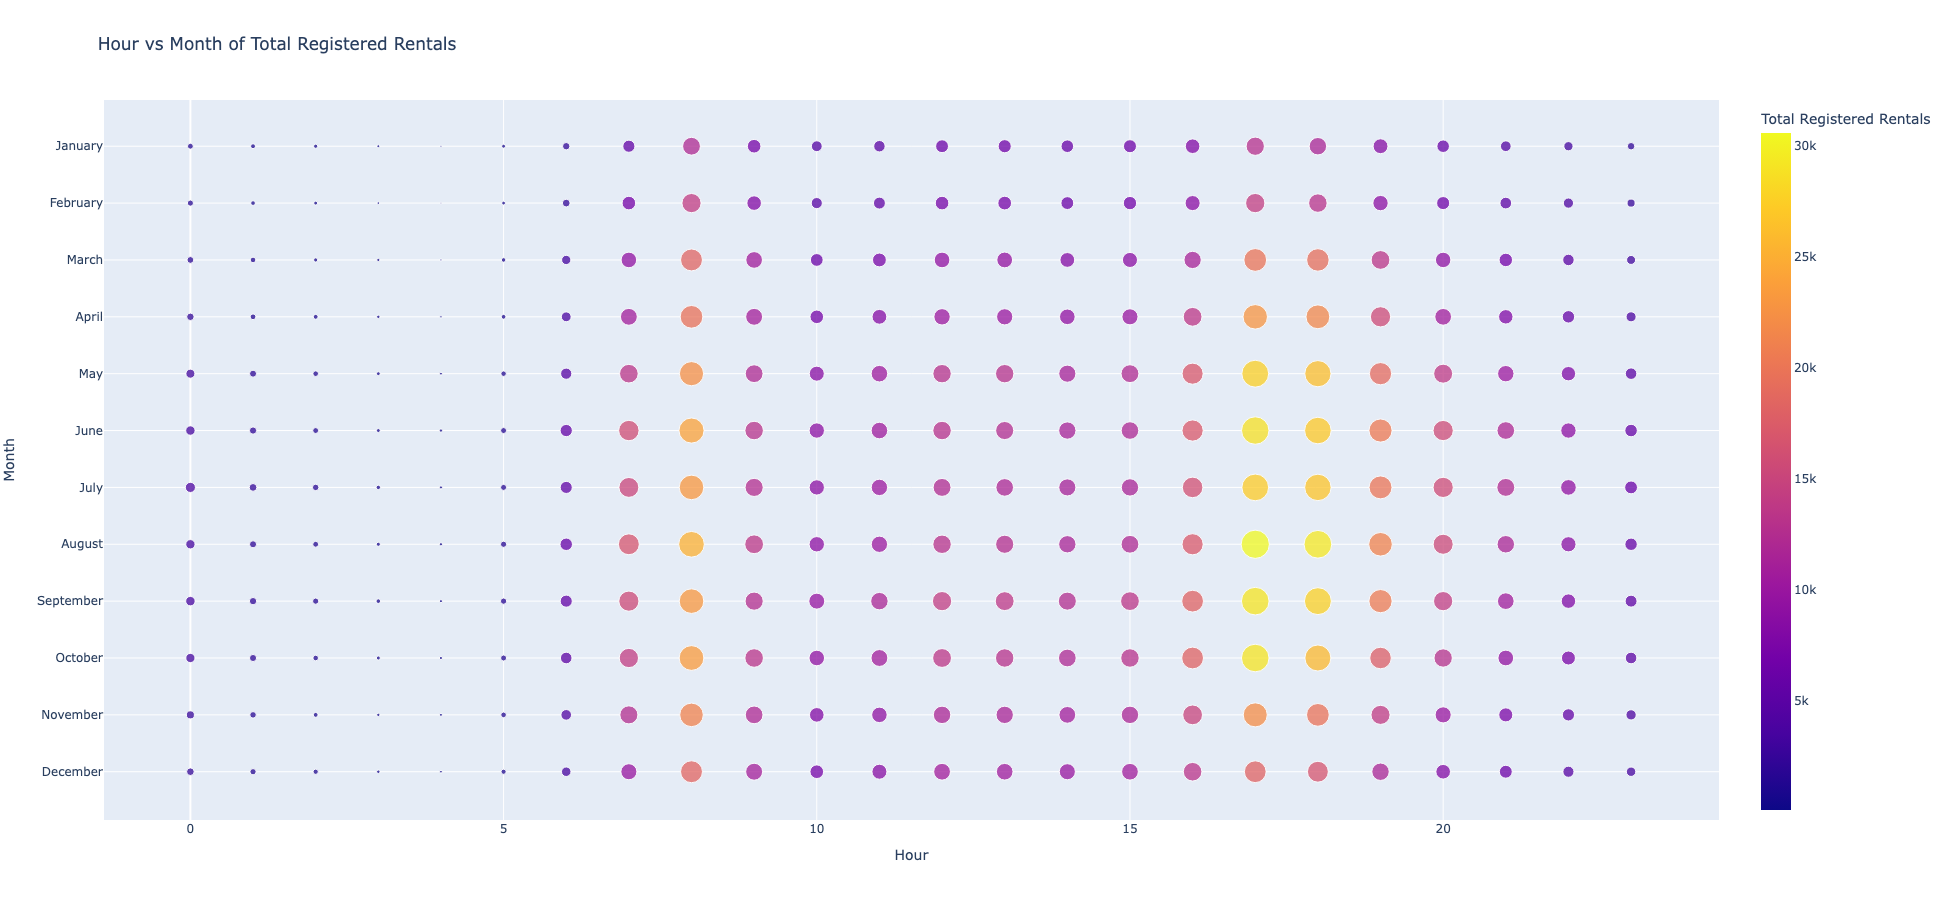

In [46]:
fig = px.scatter(df_hour_month_registered, x = 'hr', y = 'mnth', color = 'registered', size = 'registered', opacity = 0.75, 
                 category_orders = {'mnth': months}, labels = plot_labels, title = 'Hour vs Month of Total Registered Rentals')
scale_plot(fig, 1200, y_length)
fig.show()

In [47]:
# 3D Representation of Total Registered Rentals on Hour vs Month from 2011 to 2012
fig = px.line_3d(df_hour_month_registered, x = 'hr', y = 'mnth', z = 'registered', color = 'mnth', 
                 category_orders = {'mnth': months}, labels = plot_labels, title = '3D Representation for Hour vs Month of Total Registered Rentals')
scale_plot(fig, x_length, y_length)
fig.show()